In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_set = train_datagen.flow_from_directory('shapes/train',target_size=(64, 64), class_mode='categorical')

Found 12000 images belonging to 4 classes.


In [4]:
#train_set.batch_size

In [5]:
test_set = test_datagen.flow_from_directory('shapes/test',target_size=(64, 64), class_mode='categorical')

Found 400 images belonging to 4 classes.


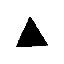

In [6]:
from tensorflow.keras.preprocessing import image
img1 = image.load_img('shapes/inference/3709.png' ,target_size =(64, 64))
img1

In [7]:
img1 = image.img_to_array(img1)
img1.shape

(64, 64, 3)

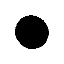

In [8]:
img2 = image.load_img('shapes/inference/3718.png' ,target_size =(64, 64))
img2

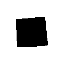

In [9]:
img3 = image.load_img('shapes/inference/3764.png' ,target_size =(64, 64))
img3

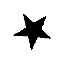

In [10]:
img4 = image.load_img('shapes/inference/732.png' ,target_size =(64, 64))
img4

In [11]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (64, 64, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [12]:
model.add(Flatten())   
model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'relu', units=32))
model.add(Dense( activation = 'relu', units=12))
model.add(Dense( activation = 'softmax', units=4)) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.fit(train_set,epochs=1,validation_data=test_set)

375/375 [==============================] - 188s 500ms/step - loss: 0.0893 - accuracy: 0.9592 - val_loss: 0.0011 - val_accuracy: 1.0000


In [16]:
train_set.class_indices

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}

In [18]:
img1 = image.img_to_array(img1)
img1 = img1.reshape(1,64, 64, 3)
result = model.predict(img1)
result

array([[0., 0., 0., 1.]], dtype=float32)

In [19]:
img2 = image.img_to_array(img2)
img2 = img2.reshape(1,64, 64, 3)
result = model.predict(img2)
result

array([[1., 0., 0., 0.]], dtype=float32)

In [20]:
img3 = image.img_to_array(img3)
img3 = img3.reshape(1,64, 64, 3)
result = model.predict(img3)
result

array([[0., 1., 0., 0.]], dtype=float32)

In [21]:
img4 = image.img_to_array(img4)
img4 = img4.reshape(1,64, 64, 3)
result = model.predict(img4)
result

array([[0., 0., 1., 0.]], dtype=float32)